# **Part 1 ‑ Exploratory data analysis**
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

**Solution:**
I would suspect daily cycle and weekly cycle for this data. To observe these cycles, as suggested I wll do 15minute aggregates for daily cycle and 24hr aggregates for weekly cycles. I will also compare weekdays and weekends.

In [1]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
json = pd.read_json('logins.json')

In [3]:
# creating 15min, 1hr, 12hr and 24hr intervals.
json_15min = json.resample('15min',on='login_time').count()
json_24hr = json.resample('24H',on='login_time').count()

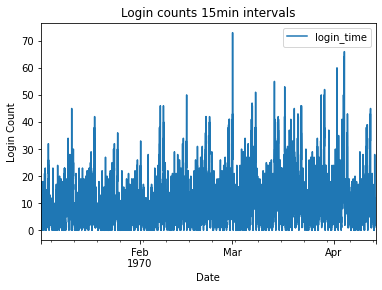

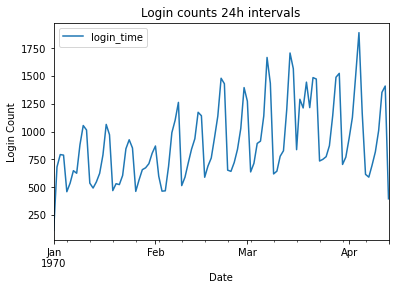

In [4]:
json_15min.plot()
plt.title('Login counts 15min intervals')
plt.ylabel('Login Count')
plt.xlabel('Date')


json_24hr.plot()
plt.title('Login counts 24h intervals')
plt.ylabel('Login Count')
plt.xlabel('Date')

plt.show()

To observe the clear pattern I will focus on a region.

In [5]:
# Identifying the day of the week and hour using the timestamp index
json_15min['day_of_week'] = json_15min.index.dayofweek
json_15min['hour'] = json_15min.index.hour

In [6]:
# grouping the data with respect to hour of the day and taking average of login_time
df_hour = json_15min.groupby('hour').mean()[['login_time']]

**Question:** What is the average login count with respect to the hour of the day?

**Answer:** Login counts increase during noon (10AM to noon) and early evening (8PM) and lasts until early morning (4AM).

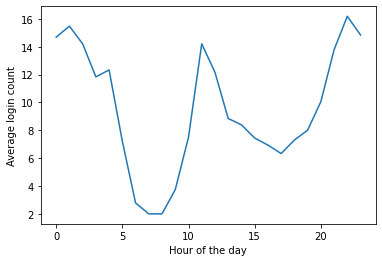

In [7]:
plt.plot(df_hour.index, df_hour.login_time)
plt.xlabel('Hour of the day')
plt.ylabel('Average login count')
plt.show()

**Question:** How does day of the week impact login counts throughout the day? 

**Answer:** Login counts increase during noon (10AM to noon) and early evening (8PM) and have low levels early in the morning and afternoon during the weekdays (Days 0-4). However, during weekends counts increase in the afternoon(3PM) and very early in the morning(3AM).

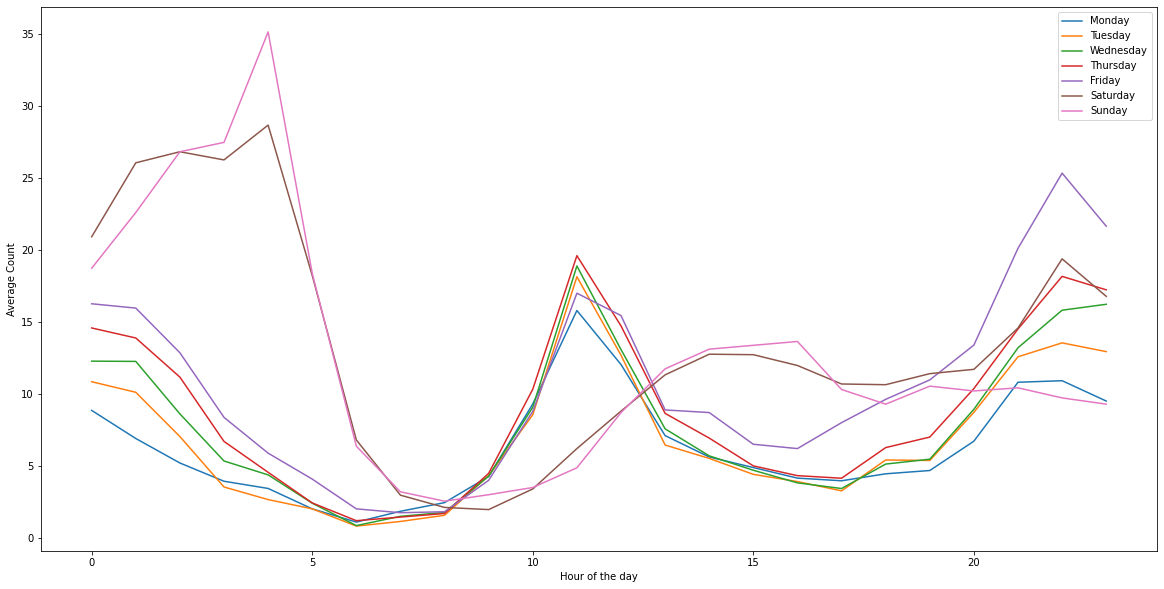

In [8]:
plt.figure(figsize = ( 20 , 10 ))
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in range(7):
    Day = json_15min[json_15min.day_of_week ==i]
    df = Day.groupby('hour').mean()
    plt.plot(df.index, df.login_time,label= days[i])
plt.legend()
plt.xlabel('Hour of the day')
plt.ylabel('Average Count')
plt.show()

**Question:** Is there a cyclic behaviour in a weekly frequency?

**Answer:** Login counts tend to increase towards weekend. 

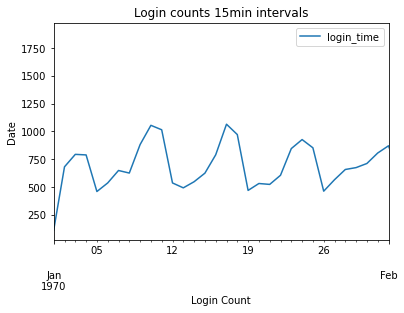

In [9]:
json_24hr.plot()
plt.title('Login counts 15min intervals')
plt.xlabel('Login Count')
plt.ylabel('Date')
plt.xlim('1970-01-01','1970-02-01')
plt.show()

In [10]:
json_24hr.index[4].day_name()

'Monday'

We can observe the cyclic behaviour repeated every 7 days. 1970-01-05 is Monday and the count number increases as the day reaches to Saturday/Sunday and decreases again on Monday (1970-01-12).

# Part 2 ‑ Experiment and metrics design

**Question:** What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

**Answer:** 

***Pick-up/Drop off locations of the trips:*** Two-way toll causes drivers to be exclusive to the other city. The reimbursement is expected to make drivers to accept rides that involves intercity trips. We can map the pick-up and drop-off locations to cities and measure if ratio or numbers of intercity rides increases or not.

***Average number of rides:*** The exclusive behavior of drivers reduces the rides they accept. Removal of this barrier can increase the number of rides a driver provides.

***Number of cancelled ride:*** Since bridge toll is reimbursed, we would expect drivers accept all rides.

***Revenue:*** The financial impact of this experiment is the final readout. How does incorporation of toll reimbursement impact the revenue of the company.


**Question:**
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
1. how you will implement the experiment
2. what statistical test(s) you will conduct to verify the significance of the observation
3. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

**Answer:** 

1. A/B testing will be done. Drivers from both cities will be selected and assigned to control and test groups using random sampling. Daily metrics will be compared between two groups. Experiment needs to be conducted long enough to consider the weekly (weekday/weekend) fluctuations. 

H0: Toll reimbursement does not have impact on following metrics: Ratio of Inner city or Inter city rides, Average number of rides, Revenue
HA: Toll reimbursement increases the ratio of intercity rides, average number of rides, revenue

2. Two-sample t-test will be applied to collected data. 

3. Lets go over metrics one by one:
    * ***Pick-up/Drop off locations of the trips:*** If the test group has lower inter city trip ratio than the control group and the result is statistically significant, it means toll reimbursement reduces the exclusive behavior.
    * ***Average number of rides:*** This metric will tell us if the average number of rides increases in the test group compared to the control group. Since revenue per ride will decrease due to bridge toll reimbursment, our solution would be to increase number of trips to keep up the revenue.
    * ***Number of cancelled ride:*** It is important to reduce this metric in the test group since this would improve the rider retention and attract more riders since Ultimate service will be more reliable.
    * ***Revenue:*** Most important metric, we expect to increase the revenue by making this change.

# Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

## Data Cleaning, Exploratory Analysis:

In [11]:
ultimate = pd.read_json('ultimate_data_challenge.json')

In [12]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [13]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [14]:
# converting 'signup_date' and 'last_trip_date' to datetime format
ultimate.signup_date = pd.to_datetime(ultimate.signup_date)
ultimate.last_trip_date = pd.to_datetime(ultimate.last_trip_date)

In [15]:
#checking if there are any users whose signup date is later than last_trip_date.

(ultimate.signup_date>ultimate.last_trip_date).sum()

0

In [16]:
# calculating the date 6-months after signup_date for each user.
ultimate['six_months'] = ultimate.signup_date.apply(pd.DateOffset(180))

/Users/dagdasy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4108: FutureWarning: DateOffset.__call__ is deprecated and will be removed in a future version.  Use `offset + other` instead.
  mapped = lib.map_infer(values, f, convert=convert_dtype)


In [17]:
(ultimate.last_trip_date > ultimate.six_months).sum()

13

In [18]:
# filtering out users that have last_trip_date later than post 6-months date
ultimate = ultimate[ultimate.last_trip_date <= ultimate.six_months]

In [19]:
# identifyin users that have taken a trip in last 30days of post 6-months period.
ultimate = ultimate.assign(is_active = (ultimate.six_months.apply(pd.DateOffset(-30)) <= ultimate.last_trip_date))
ultimate.is_active = ultimate.is_active.replace({True:1,False:0})

/Users/dagdasy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4108: FutureWarning: DateOffset.__call__ is deprecated and will be removed in a future version.  Use `offset + other` instead.
  mapped = lib.map_infer(values, f, convert=convert_dtype)


In [20]:
# replacing True, False values with 1, 0
ultimate.ultimate_black_user = ultimate.ultimate_black_user.replace({True:1,False:0})

In [21]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,six_months,is_active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,2014-07-24,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,2014-07-28,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,2014-07-05,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,2014-07-09,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,2014-07-26,0


In [22]:
print(f'Ratio of retained users is: {round(100*ultimate.is_active.mean(),2)}%')

Ratio of retained users is: 25.41%


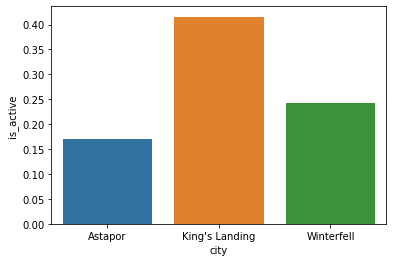

In [23]:
df = pd.DataFrame(ultimate.groupby('city')['is_active'].mean()).reset_index()
sns.barplot(x='city',y='is_active',data=df)
plt.show()

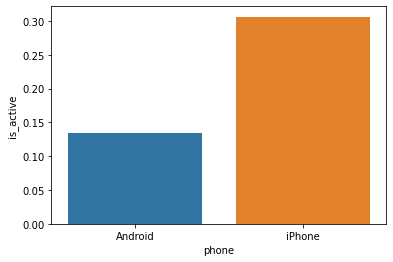

In [24]:
df = pd.DataFrame(ultimate.groupby('phone')['is_active'].mean()).reset_index()
sns.barplot(x='phone',y='is_active',data=df)
plt.show()

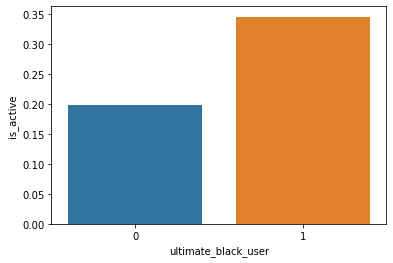

In [25]:
df = pd.DataFrame(ultimate.groupby('ultimate_black_user')['is_active'].mean()).reset_index()
sns.barplot(x='ultimate_black_user',y='is_active',data=df)
plt.show()

In [26]:
ultimate.corrwith(ultimate.is_active)

trips_in_first_30_days    0.210113
avg_rating_of_driver     -0.008566
avg_surge                 0.006830
surge_pct                 0.017831
ultimate_black_user       0.163522
weekday_pct               0.007810
avg_dist                 -0.091907
avg_rating_by_driver     -0.021449
is_active                 1.000000
dtype: float64

In [27]:
ultimate.groupby('is_active').mean()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
is_active,,,,,,,,
0,1.813093,4.604828,1.073883,8.641788,0.330902,60.756944,6.103564,4.783755
1,3.640343,4.593070,1.077372,9.459342,0.512952,61.422274,4.898553,4.761764


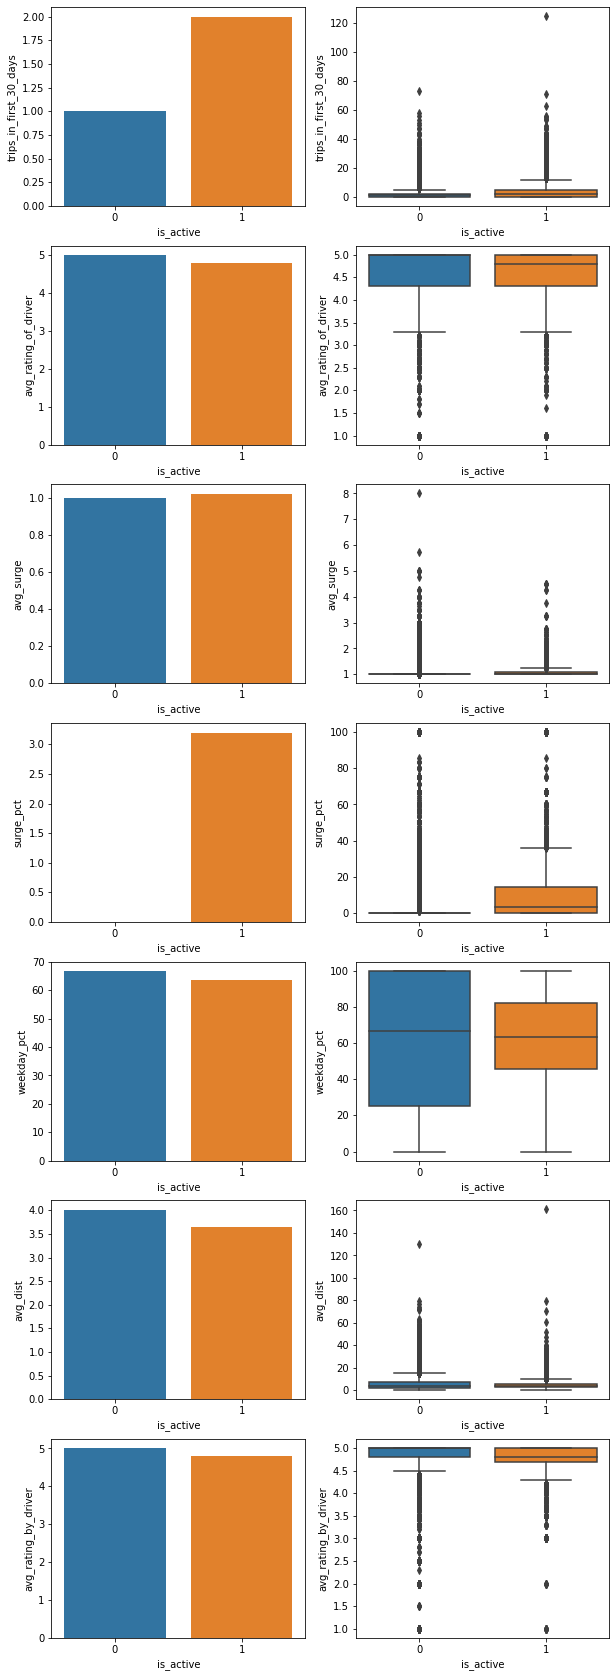

In [28]:
columns = ['trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver']
plt.figure(figsize = (10,30))
for i in range(len(columns)):
    df = pd.DataFrame(ultimate.groupby('is_active')[columns[i]].median()).reset_index()
    plt.subplot(len(columns),2,2*i+1)
    sns.barplot(x='is_active', y=columns[i],data=df)
    plt.subplot(len(columns),2,2*i+2)
    sns.boxplot(x='is_active', y=columns[i],data=ultimate)
plt.show()

**Task:** Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

**Solution/Answer:** 
First of all, my task is to determine whether a user is active or not in their 6th month in the system. The criteria for a user to be active is to use the app in the last 30 days. So, I created a new column by adding 6 months (180 days) to each user's sign-up date and compared whether the last trip date of the user is within last 30 days or not.Based on this approach I found that the ratio of retained/active users is **0.25**.

EDA has revealed couple of things:
1. The ratio of active users is highest in King's Landing and lowest in Astapor.
2. The ratio of active users is almost double in Iphone users compared to Android users.
3. The ratio of active users higher for ultimate black users.
4. The average number of trips in 30days is higher for active users.
5. The active users have lower average for average distances compared to inactive users.


## Predictive Model:

We are tasked to identify users that have used the service (last_trip_date), in the last 30-days of 6-months after they signed up(signup_date). Here are the steps:
1. Are there any users with signup_date later than last_trip_date? If there are any drop them.
2. Calculate the 6-month after signup_date for each user.
3. Are there any users with last_trip_date later post 6-month period from sign_up date? If there are any drop them.
4. Identify users whose last_trip_date is in last 30 days period of post 6-months. Assign it to 'is_active' column.

In [29]:
# dropping columns
ultimate.drop(['signup_date','last_trip_date','six_months'],axis=1,inplace=True)

In [30]:
# filling the missing values
ultimate.avg_rating_of_driver.fillna(ultimate.avg_rating_of_driver.median(),inplace=True)
ultimate.avg_rating_by_driver.fillna(ultimate.avg_rating_by_driver.median(),inplace=True)

In [31]:
ultimate_transformed = pd.get_dummies(ultimate)

In [32]:
ultimate_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49987 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  49987 non-null  int64  
 1   avg_rating_of_driver    49987 non-null  float64
 2   avg_surge               49987 non-null  float64
 3   surge_pct               49987 non-null  float64
 4   ultimate_black_user     49987 non-null  int64  
 5   weekday_pct             49987 non-null  float64
 6   avg_dist                49987 non-null  float64
 7   avg_rating_by_driver    49987 non-null  float64
 8   is_active               49987 non-null  int64  
 9   city_Astapor            49987 non-null  uint8  
 10  city_King's Landing     49987 non-null  uint8  
 11  city_Winterfell         49987 non-null  uint8  
 12  phone_Android           49987 non-null  uint8  
 13  phone_iPhone            49987 non-null  uint8  
dtypes: float64(6), int64(3), uint8(5)
memo

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, precision_score,classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold, validation_curve

In [34]:
# assigning features and target
X = ultimate_transformed.drop(['is_active'],axis=1)
y = ultimate_transformed.is_active

#splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify = y)

In [35]:
print(np.mean(y_test))
print(np.mean(y_train))

0.2540508101620324
0.254094876090925


In [36]:
RFC = RandomForestClassifier(class_weight={0: 3, 1: 1})
RFC.fit(X_train, y_train)
# Print the accuracy from the testing data.
y_predict_test = RFC.predict(X_test)
y_predict_train = RFC.predict(X_train)
print(f'Model accuracy for test data: {round(100 * accuracy_score(y_test,y_predict_test),2)}%')
print(f'Model accuracy for training data: {round(100* accuracy_score(y_train,y_predict_train),2)}%')
print(classification_report(y_test,y_predict_test))

Model accuracy for test data: 76.96%
Model accuracy for training data: 99.78%
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      7458
           1       0.55      0.48      0.51      2540

    accuracy                           0.77      9998
   macro avg       0.69      0.67      0.68      9998
weighted avg       0.76      0.77      0.76      9998



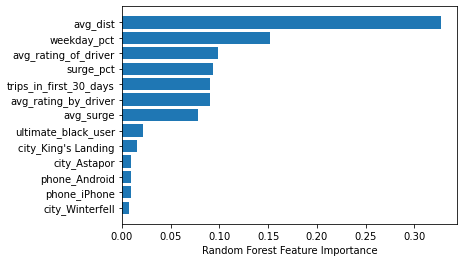

In [37]:
sorted_index = RFC.feature_importances_.argsort()
plt.barh(X.columns[sorted_index], RFC.feature_importances_[sorted_index])
plt.xlabel("Random Forest Feature Importance")
plt.show()

## Model Insights:



Random Forest Classifier for this challenge to predict whether a user is retained or not 6-month after sign in for the app. The procedure to determine whether a user is active or not is explained above in detail. The top 4 features of the model are: Average distance, Weekday percentage,  Average rating of the driver, Surge percentage. Marketing team can use these features to create campaigns to improve retention rate.

